In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
!python -V

Python 3.7.12


In [8]:
mpl.__version__

'3.2.2'

## Functions

In [9]:
# from digraph import * 

In [10]:
# Instead of importing, here are the functions pasted in. 
def node(center, radius = 'auto', label = '',
            ax = None, circleprops = {'facecolor':(.9,.99,.9), 'edgecolor':'black'}):
    """Plot labeled circle object to represent a node. 
    Must be called after any changes to axes limits, aspect changes, etc if using radius = 'auto'."""
    
    if ax == None:
        ax = plt.gca()
    
    t = ax.text(center[0], center[1], label, ha = 'center', va = 'center')
    if radius == 'auto':
        plt.gcf().canvas.draw()
        box = t.get_window_extent().transformed(ax.transData.inverted())
        width = box.x1 - box.x0
        radius = (width/2)*1.2
    
    c = plt.Circle(center, radius, **circleprops)
    ax.add_artist(c)
    return c

def directed_edge(c1, c2, ax = None, label = '', color = 'C0'):
    """Draw an arrow from node c1 to node c2."""
    
    if ax == None:
        ax = plt.gca()
    
    center1 = c1.center
    center2 = c2.center
    
    length = np.linalg.norm(np.array(center1) - np.array(center2))

    r1 = c1.get_radius()
    r2 = c2.get_radius()
    
    x1, x2 = center1[0], center2[0]
    y1, y2 = center1[1], center2[1]

    # Find start and end of arrow based on circle radii
    # based on linear weights from convex combos
    tail_weight = r1 / length
    tail_x = (1-tail_weight)*x1 + tail_weight*x2
    tail_y = (1-tail_weight)*y1 + tail_weight*y2
    tail_point = (tail_x, tail_y)

    head_weight = r2/ length    
    head_x = (1-head_weight)*x2 + head_weight*x1
    head_y = (1-head_weight)*y2 + head_weight*y1
    head_point = (head_x, head_y)

    ax.annotate('', xy = head_point, xytext = tail_point, 
            arrowprops = dict(headwidth = 14,
                        linewidth = .1,
                        width = 2,
                        color = color))

    if label:
        arrow_center = np.mean([head_point, tail_point], axis = 0)
        arrow_slope = (head_y - tail_y) / (head_x - tail_x)

        ha = 'left' * (arrow_slope > 0) + 'right' * (arrow_slope <= 0)
        va = 'center'

        ax.text(*arrow_center, label)


def get_bbox(ax = None):
    
    """Get the bounding box that contains all nodes/circle objects."""
    
    if ax == None:
        ax = plt.gca()
    
    # node circle objects
    circles = [x for x in ax.get_children() if isinstance(x, mpl.patches.Circle)]
    
    xs, ys = list(), list()

    for item in circles:    

        bb = item.get_window_extent().transformed(ax.transData.inverted())
        xs.append(bb.x0)
        xs.append(bb.x1)

        ys.append(bb.y0)
        ys.append(bb.y1)


    ylims = [np.min(ys), np.max(ys)]
    xlims = [np.min(xs), np.max(xs)]
    
    a, b = [xlims[0], ylims[0]], [xlims[1], ylims[1]]
    bbox = mpl.transforms.Bbox([a,b])
    
    return bbox

def reset_limits(ax = None, pad = 0.01):
    
    """Reset axes limits according to the peripheral nodes to fit everything in the plot window.
    Don't use with automatic radius."""

    if ax == None:
        ax = plt.gca()
        
    bbox = get_bbox(ax = ax)
    
    ax.set_xlim(bbox.x0 - pad, bbox.x1 + pad)
    ax.set_ylim(bbox.y0 - pad, bbox.y1 + pad)


## Examples

### Example 1

Education is not human capital accumulation.

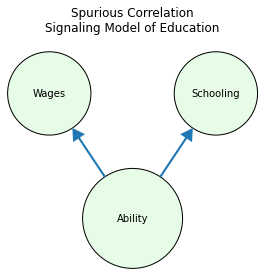

In [11]:
fig, ax = plt.subplots()

ax.set_aspect(1) # make square plot
ax.axis('off')

# Make DAG for spurious correlation

schooling = node((2,3), radius = 1, label = 'Schooling')
wages = node((-2,3), radius = 1, label = 'Wages')
ability = node((0,0), radius = 1.2, label = 'Ability') 

directed_edge(ability, schooling)
directed_edge(ability, wages)

plt.title("Spurious Correlation\nSignaling Model of Education", pad = 20)

reset_limits()

### Example 2

Being louder makes you more convincing.

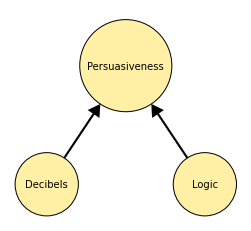

In [12]:
fig, ax = plt.subplots()

ax.set_aspect(1) # make square plot
ax.axis('off')

# set limits at before creating nodes with auto radius
ax.set_xlim(-3, 3)
ax.set_ylim(-1,4.5)

canary = (1,.94,.65)
circle_props = {'facecolor' : canary, 'edgecolor' : 'black'}

persuasiveness = node((0,3), label = 'Persuasiveness', circleprops = circle_props)
decibels = node((-2, 0 ), radius = .8, label = 'Decibels', circleprops = circle_props)
logic = node((2,0), radius = .8, label = 'Logic', circleprops = circle_props)


directed_edge(logic, persuasiveness, color = 'black')
directed_edge(decibels, persuasiveness, color = 'black')

#get_bbox() # uncomment and run to help update axes limits if necessary